In [1]:
!git clone https://github.com/Rajdip801/Major_Project.git

Cloning into 'Major_Project'...
remote: Enumerating objects: 8758, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8758 (delta 2), reused 10 (delta 2), pack-reused 8748
Receiving objects: 100% (8758/8758), 370.76 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (12544/12544), done.


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Importing the necessary libraries:
## Importing TensorFlow and Keras libraries:

This code imports the tensorflow and keras Python libraries. The tensorflow library contains tools for building and training machine learning models. The keras library contains tools for building neural networks specifically, which are a type of machine learning model.

Importing these two libraries allows us to use the machine learning tools they provide in the rest of the code. The tools imported include things like model architectures, layers, optimizers, losses, and metrics.

## Importing Matplotlib library:

This imports the matplotlib Python library which provides functionality to plot graphs and visualize data. This will allow us to visualize things like accuracy/loss curves when training models, or visualizing the predictions of a model on test data. Having visualization capabilities is important for understanding how machine learning models are behaving.

Overall, these three import statements bring in external libraries that will provide the key building blocks needed to build, train, evaluate, and visualize machine learning models in the rest of the code. They don't execute any training or processing themselves, just import the tools needed to do so later.

In [34]:
BATCH_SIZE = 32
IMAGE_SIZE = 190
CHANNELS=3
EPOCHS=15


## BATCH_SIZE

The BATCH_SIZE variable controls how many images are processed together in each training batch. Setting a larger batch size can speed up training but requires more memory. 

## IMAGE_SIZE

The IMAGE_SIZE variable specifies the height and width dimensions that all images will be resized to before being fed into the model. This standardizes the input data.

## CHANNELS

The CHANNELS variable specifies how many color channels the input images have - typical values are 1 for grayscale or 3 for color RGB images. 

## EPOCHS

The EPOCHS variable sets the number of full passes through the training dataset the model will take during training. More epochs allow the model to train for longer and possibly achieve better accuracy, but can increase training time.

Together these variables configure some key hyperparameters or settings that will shape the image classification model's training process and performance. They don't directly process any inputs or outputs, but set stage for the model training code that will follow later using these values.

In [4]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 8582 files belonging to 4 classes.


dataset = tf.keras.preprocessing.image_dataset_from_directory() loads images from a directory to create an image dataset.

It takes as input the path to a directory containing subfolders of images ("Major_Project/Training"). The images in each subfolder will be labeled with the subfolder name.

It also takes additional configuration parameters:

seed: sets random seed for shuffling the data
shuffle: whether to randomly shuffle the images
image_size: resize images to this size
batch_size: number of images per batch
The output is a TensorFlow Dataset object (dataset) that can be used for training and evaluation.

Internally, it scans the directory structure, reads images from disk, decodes them into tensors, resizes them, and shuffles/batches them. This allows easy loading of a directory of images into a consistent format for a machine learning model to consume.

By configuring parameters like image size and batch size, you can customize how the images are prepared as training data. The shuffle and seed parameters control randomization to help your model generalize better. Overall, this provides a simple way to go from a directory of images to a standardized dataset for image classification.

In [5]:

class_names = dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

class_names is a variable that is assigned the class_names attribute from the dataset object.

This code snippet is retrieving the list of class names from a dataset that has been used to train a classification model. The class_names attribute contains the names of the different classes that the model can predict. For example, if this is an image classification model, class_names may contain labels like ["cat", "dog", "bird"].

By assigning dataset.class_names to class_names, we are extracting just the list of class names from the dataset object and storing it in a separate variable. This allows us to access the class names directly later, without having to go through the dataset object each time.

The class_names variable will contain a list of strings, with each string being the name of a class from the dataset. This will likely be used later when making predictions with the model, to map the model's numeric predictions to the actual class names for interpretation. For example, if the model predicts "2", we could use class_names[2] to see that the predicted class is "dog".

In summary, this code extracts the class names from a classification dataset into a separate variable for later use in interpreting predictions. It takes the dataset object as input, and produces a list of class name strings as output. By storing the class names, it avoids repetitive calls to dataset.class_names and makes the class names directly accessible.

In [6]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 190, 190, 3)
[0 1 2 1 3 3 1 0 0 2 1 1 3 2 3 1 2 0 0 0 3 1 0 2 0 0 3 3 3 2 1 1]


This code snippet is iterating through the dataset and printing information about the first batch.

The for loop is used to iterate through the dataset, with each iteration providing an image batch and corresponding labels batch.

The dataset.take(1) limits it to just taking the first batch, rather than iterating through the full dataset.

On each iteration, it prints the shape of the image batch, which shows the dimensions of the batch of images.

It then prints the actual label values for the batch by calling .numpy() on the labels_batch tensor to convert it to a numpy array.

So in summary, it is simply extracting the first batch of images and labels from the dataset, then printing some information to inspect what the batch contains - the image shapes and the label values. This is useful for sanity checking that the data pipeline is working as expected by peeking at the first batch of data being fed into the model during training.

The key steps are:

Iterate through dataset in batches using a for loop
Take just the first batch using dataset.take(1)
Print the shape of the image batch
Print the actual label values by converting the tensor to numpy
So it provides a simple sanity check on the dataset by printing some info about the first batch of images and labels.

In [7]:
# plt.figure(figsize=(10, 10))
# for image_batch, labels_batch in dataset.take(1):
#     for i in range(12):
#         ax = plt.subplot(3, 4, i + 1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[labels_batch[i]])
#         plt.axis("off")

In [8]:

len(dataset)
train_size = 0.8
len(dataset)*train_size
train_ds = dataset.take(215)
len(train_ds)
test_ds = dataset.skip(215)
len(test_ds)
val_size=0.1
len(dataset)*val_size
val_ds = test_ds.take(27)
len(val_ds)
test_ds = test_ds.skip(27)
len(test_ds)

269

This code is splitting a dataset into training, validation, and test sets for use in machine learning model development.

First, it calculates the length of the full dataset to get the total number of samples.

It then defines the training set size as 80% of the full dataset length, and takes that number of samples from the start to create the training set.

Next, it calculates the validation set size as 10% of the full dataset length, and takes that number of samples from the start of the remaining data to create the validation set.

The test set is created by skipping the validation samples from the remaining data after the training set was taken.

So in summary, it takes the full dataset, splits off 80% to training, then 10% to validation from the remaining 20%, and leaves the final 10% as the test set. This follows a common machine learning practice of creating disjoint training, validation and test sets from a full dataset in order to properly develop, tune and evaluate a model. The training set is used to train the model, validation set is used to tune hyperparameters and monitor performance during training, and the test set is held back completely until final model evaluation.

# Splitting the dataset into the Training set Test set and Validation Set

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

This code defines a function called get_dataset_partitions_tf that splits a dataset into training, validation and test subsets.

It takes a dataset ds as input, along with the desired percentages for train, validation and test splits (defaulting to 0.8, 0.1 and 0.1). There is also a shuffle parameter to randomly shuffle the dataset first if needed, and a shuffle_size parameter to control the shuffling buffer size.

The function first checks that the split percentages add up to 1.0. It then gets the size of the dataset and calculates the number of samples that should go in each split based on the percentages.

If shuffling is enabled, it will shuffle the dataset with the specified buffer size.

It then uses take and skip to slice up the dataset into the train, validation and test subsets accordingly.

The train set takes the first train_size samples, the validation set takes the next val_size after skipping the train set, and the test set takes whatever remains after skipping the train and validation.

Finally, it returns the three subset datasets train_ds, val_ds and test_ds.

So in summary, it takes a dataset, optional split percentages and shuffling parameters, splits the dataset into training/validation/test sets based on those percentages, and returns the three subset datasets. This is a common pattern for preparing data for training, validation and testing of a machine learning model.

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds),len(test_ds),len(val_ds))

The selected code snippet get_dataset_partitions_tf splits a dataset into training, validation, and test subsets.

It takes as input a dataset object that contains the full dataset. The dataset is assumed to contain examples that can be used for training, validating, and testing a machine learning model.

The code first calls a function called get_dataset_partitions_tf, passing the dataset object as a parameter. This function handles splitting the dataset into three separate subsets - train_ds, val_ds, and test_ds.

The get_dataset_partitions_tf function likely uses some logic to split the dataset randomly, putting a certain percentage of examples into each of the three subsets. Common splits are 60% train, 20% validation, and 20% test.

The three subset datasets - train_ds, val_ds, and test_ds - are returned from get_dataset_partitions_tf and assigned to those same variable names.

Finally, the code prints out the length of each subset dataset to confirm they have been created properly. The lengths should add up to the total number of examples in the original full dataset.

In summary, this code takes a full dataset, splits it into train/validation/test sets, assigns those to variables, and prints their lengths. This is a common data preparation step when working with machine learning datasets in order to create proper subsets for training and evaluating models.

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

This code is preprocessing three TensorFlow datasets - train_ds, val_ds, and test_ds - to improve training performance.

It takes as input the three TensorFlow dataset variables that have already been defined and loaded with data elsewhere in the code.

The output is the same three dataset variables, but now modified to cache, shuffle, and prefetch the data they contain.

The cache() method keeps a copy of the dataset in memory to avoid reloading it from disk on each iteration.

The shuffle(1000) randomly reshuffles the data to help prevent bias and overfitting during training. The number 1000 controls the size of the shuffle buffer.

The prefetch() method overlaps data preprocessing and model execution by preloading batches in the background while the model is training on the current batch.

So in summary, these three chained method calls on each dataset are optimizing data loading, randomizing data order, and pipelining data processing to make the overall training process more efficient and effective.

By applying these optimizations to the training, validation, and test datasets, the model will be trained on high-quality, randomized data batches fed efficiently to maximize performance.

# Prepare the dataset using data augmentation 

In [19]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

The resize_and_rescale Sequential model performs image preprocessing on input images.

It takes as input images of any size. The first layer Resizing resizes the images to a fixed size of IMAGE_SIZE x IMAGE_SIZE pixels. This standardizes the input image dimensions.

The second layer Rescaling scales the pixel values to be between 0 and 1 by dividing each pixel value by 255. This puts the values in a common range for easier learning.

By chaining together these two preprocessing layers into a Sequential model, resize_and_rescale applies these transformations back-to-back to any input image. The overall purpose is to prepare images for consistent input shape and value range before feeding into other models like neural networks.

The output is images resized to a standard square size and with values normalized to 0-1. No other major logic or data transformations occur.

By standardizing image sizes and pixel values, the resize_and_rescale model aims to simplify the image data for more effective training and inference. The simple preprocessing helps set up the input data for the best performance of later models.

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

The code snippet data_augmentation defines a tf.keras.Sequential model for data augmentation in image classification.

It takes as input images from the training dataset. The purpose is to artificially expand the size and diversity of the training dataset through random transformations of the input images. This helps prevent overfitting and improves the generalization of the model.

It contains two layers that perform random image transformations. The first layer, RandomFlip, randomly flips the images horizontally and vertically. The second layer, RandomRotation, randomly rotates the images up to 20% of the total range.

The output is a transformed version of the input image. Multiple transformed versions of each original image can be generated through the random augmentations.

The layers are wrapped in a tf.keras.Sequential model, which chains them together into a data processing pipeline. Each input image passes through the two augmentation layers in sequence.

In summary, the data_augmentation code defines a simple data augmentation model that artificially grows the size and diversity of a training dataset through random flipping and rotation of input images. This is a common technique in image classification to improve model training.

In [21]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

The selected code is applying a data augmentation transformation to the training data in the train_ds dataset.

It takes the train_ds dataset as input, which contains the training data of image, label pairs (x, y).

It uses the .map() method to apply a lambda function to each (x, y) pair in train_ds.

The lambda function calls the data_augmentation() function, passing the image x and setting training=True. This augments the image data in some way (like random cropping, flipping etc) to generate more varied training data.

The data_augmentation() function returns the augmented image, and the original label y is passed through unchanged.

So for each (original image, label) pair, it outputs a (new augmented image, original label) pair.

This has the effect of expanding and diversifying the training data through data augmentation transformations, which can help the model generalize better.

The .prefetch() call at the end sets up a buffer to optimize loading of batches during training.

Overall, the code takes the original training data, transforms each image while preserving labels, and returns an augmented dataset to use for training the model. The augmentation helps expose the model to more variations in the training data for better generalization.

# Creating the model

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

This code defines a Sequential model in Keras for an image classification task.

The model.Sequential() constructor creates a Sequential model, which stacks layers linearly. This allows us to define the model layer by layer.

The first layer is a resize_and_rescale layer which presumably resizes and rescales the input images as preprocessing.

The next layers are Convolutional 2D layers (Conv2D) which apply convolutions over the image to extract features. The kernel size of 3x3 is specified to define the size of the convolution window. ReLU activation is used for non-linearity.

After each Conv2D layer, a MaxPooling2D layer is added to reduce the spatial dimensions and perform downsampling. The pool size of 2x2 is specified for max pooling.

As we stack more Conv2D and MaxPooling2D layers, the model is able to extract higher-level features from the images.

After the convolutional base, the Flatten layer flattens the feature maps into a 1D vector. This is fed into a fully-connected Dense layer with ReLU activation to perform classification.

Finally, the output layer has 4 nodes (defined by n_classes) with softmax activation to output classification probabilities for the 4 classes.

In summary, this model takes input images, applies convolutions and pooling to extract features, flattens the features and applies fully-connected layers to classify the images into 4 classes based on the extracted features. The overall architecture is designed for image feature extraction and classification.

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 190, 190, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 188, 188, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 94, 94, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 92, 92, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 46, 46, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 44, 44, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

This code is configuring and compiling a neural network model in TensorFlow.

It starts by calling the compile method on the model variable, which is assumed to be a neural network model that has already been defined.

The compile method takes several arguments that specify how the model should be configured before training:

optimizer='adam' - This specifies that the Adam optimization algorithm should be used to update the model weights during training. Adam is a popular algorithm that adapts the learning rate as training progresses.

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) - This specifies the loss function that will measure how well the model is doing on the training data. Sparse categorical crossentropy is a common loss for classification problems. The from_logits=False tells it that the model outputs are not raw logit values but have already been transformed into probabilities.

metrics=['accuracy'] - This specifies that the accuracy of the model's predictions should be tracked during training as an additional metric beyond the main loss function.

After compile is called, the model is fully configured and ready to be trained by calling the fit method (not shown here). The compile step handles setting up the training internals like the optimizer, loss function, and metrics.

So in summary, this code configures and prepares a Keras neural network model for training by specifying the optimization algorithm, loss function, and metrics like accuracy that will be used and tracked during the upcoming training process. The compile call gets the model ready for efficient training.

In [25]:
# Checking for GPU
gpus=tf.config.list_physical_devices('GPU')

if gpus:
    print("the Num Available:->",len(gpus))
else:
    print("No GPUs found")

the Num Available:-> 1


# Training the Model


In [26]:

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
    )

Epoch 1/15
215/215 [==============================] - 61s 207ms/step - loss: 1.0850 - accuracy: 0.5058 - val_loss: 1.0537 - val_accuracy: 0.5144
Epoch 2/15
215/215 [==============================] - 34s 157ms/step - loss: 0.7301 - accuracy: 0.7083 - val_loss: 0.9351 - val_accuracy: 0.6130
Epoch 3/15
215/215 [==============================] - 33s 156ms/step - loss: 0.6244 - accuracy: 0.7463 - val_loss: 0.5334 - val_accuracy: 0.7981
Epoch 4/15
215/215 [==============================] - 33s 155ms/step - loss: 0.5670 - accuracy: 0.7699 - val_loss: 0.5850 - val_accuracy: 0.7260
Epoch 5/15
215/215 [==============================] - 33s 155ms/step - loss: 0.5062 - accuracy: 0.7943 - val_loss: 0.4917 - val_accuracy: 0.8221
Epoch 6/15
215/215 [==============================] - 33s 152ms/step - loss: 0.4620 - accuracy: 0.8144 - val_loss: 0.3892 - val_accuracy: 0.8642
Epoch 7/15
215/215 [==============================] - 33s 154ms/step - loss: 0.4298 - accuracy: 0.8290 - val_loss: 0.3673 - val_ac

This code fits a neural network classification model on a training dataset.

It takes as input:

train_ds: the training dataset containing images and labels to train the model on
batch_size: the number of samples per gradient update
validation_data: a dataset to evaluate the model on after each epoch
verbose: whether to print progress during training
epochs: the number of passes through the full training set
It trains the model by looping through the training data in batches for the specified number of epochs. For each batch, it makes a prediction, compares it to the true label to calculate the loss, and updates the model weights through backpropagation.

After each epoch, it evaluates the model on the validation set to monitor progress.

The output is a History object containing the training loss, validation loss, and other metrics logged during training. This shows how the model improved over time.

By repeatedly looping through the data to minimize the loss, the model learns to make predictions matching the true labels. The validation data helps prevent overfitting by tracking performance on data not used in training.

In summary, this code fits a neural network model by training it on labeled example data over a number of epochs and tracking its progress on a validation set. The end result is a trained model that can accurately classify new examples based on patterns learned from the training data.

# Testing the Model

In [27]:
scores = model.evaluate(test_ds)

28/28 [==============================] - 12s 15ms/step - loss: 0.1862 - accuracy: 0.9275


model.evaluate() is used to evaluate the performance of a trained machine learning model on a test dataset.

It takes two inputs:

test_ds - This is a TensorFlow dataset containing the test data that the model performance will be evaluated on. This should be data that the model has not seen during training.

model - This is the trained machine learning model whose performance we want to evaluate. This should have already been trained on a separate training dataset.

It returns a list of metric values reflecting how well the model performed on the test data. The exact metrics returned depend on the model, but usually include metrics like accuracy, precision, recall, F1 score, etc.

Internally, model.evaluate() iterates through each sample in the test_ds, makes predictions using the model, and compares those predictions to the true labels. It aggregates the results across the entire test set to compute the overall performance metrics.

So in summary, model.evaluate() aims to quantify how well a trained machine learning model generalizes to new, unseen data. The metrics it returns give a numerical assessment of the model's real-world performance and ability to make accurate predictions. Checking performance on test data helps identify overfitting and other issues during training before the model is deployed. The test performance metrics are very important to consider before putting a model into production.

In [30]:

print(scores[0]*10,scores[1]*10)

186.21762096881866 927.4553656578064


In [31]:
history

In [32]:

history.params

history.history.keys()
type(history.history['loss'])


len(history.history['loss'])
history.history['loss'][:5] # show loss for first 5 epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

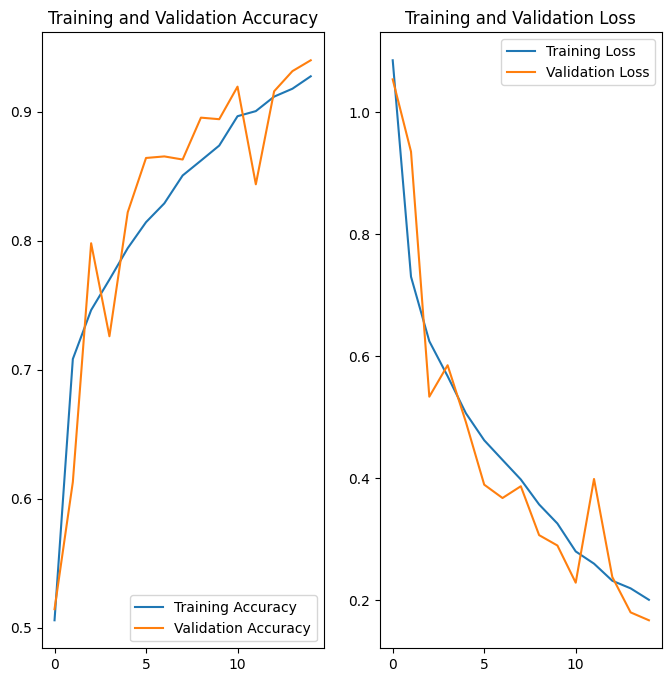

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This code plots training and validation accuracy and loss for a neural network model over epochs.

The plt.figure() call creates a new figure (graph) with specified width and height.

plt.subplot() divides this figure into 2 subplots vertically.

The first subplot on the left plots the training and validation accuracy over epochs. The range() function generates the x values from 0 to EPOCHS. acc and val_acc contain the training and validation accuracy values for each epoch. These are plotted using plt.plot(). Labels are added with plt.legend(). A title is added with plt.title().

The second subplot on the right plots the training and validation loss over epochs, similar to the accuracy plot. loss and val_loss contain the training and validation loss values.

Overall, this code generates a figure with two subplots side by side - one showing model accuracy over epochs, and the other showing model loss over epochs. This is a common way to visualize model performance during training. The training and validation curves allow comparing how well the model fits the training data vs generalizes to new data over time.

first image to predict
actual label: glioma_tumor
1/1 [==============================] - 0s 216ms/step
predicted label: glioma_tumor


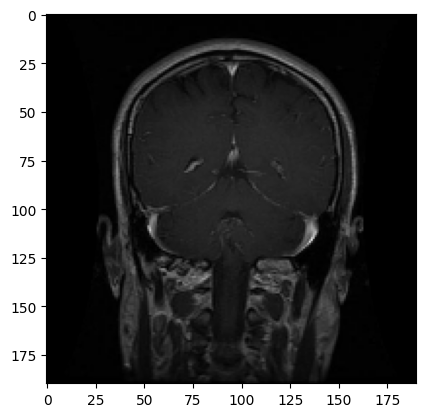

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

The predict function is used to make predictions using a trained machine learning model. It takes a model and an image as inputs.

The image is first converted into a numpy array using img_to_array. This puts the image data into a format the model can understand.

The image array is then reshaped into a single sample with expand_dims. This converts the flat array into a "batch" of one image.

The model makes a prediction on the image by calling model.predict. This runs the image through the model and returns the predicted classes and probabilities.

The class with the highest probability is considered the model's predicted class. The index of this class is found using np.argmax.

The class name itself is looked up from the class_names list using the predicted index.

The confidence score is calculated by taking the maximum predicted probability and converting to a percentage.

The predict function returns the predicted class name and confidence percentage as outputs.

So in summary, it takes an image, runs it through a trained model, looks up the best matching class, and returns the prediction - converting the outputs into a readable class name and confidence score along the way. The main logic flow is preparing the data, making the prediction, and interpreting the results.

1/1 [==============================] - 0s 18ms/step


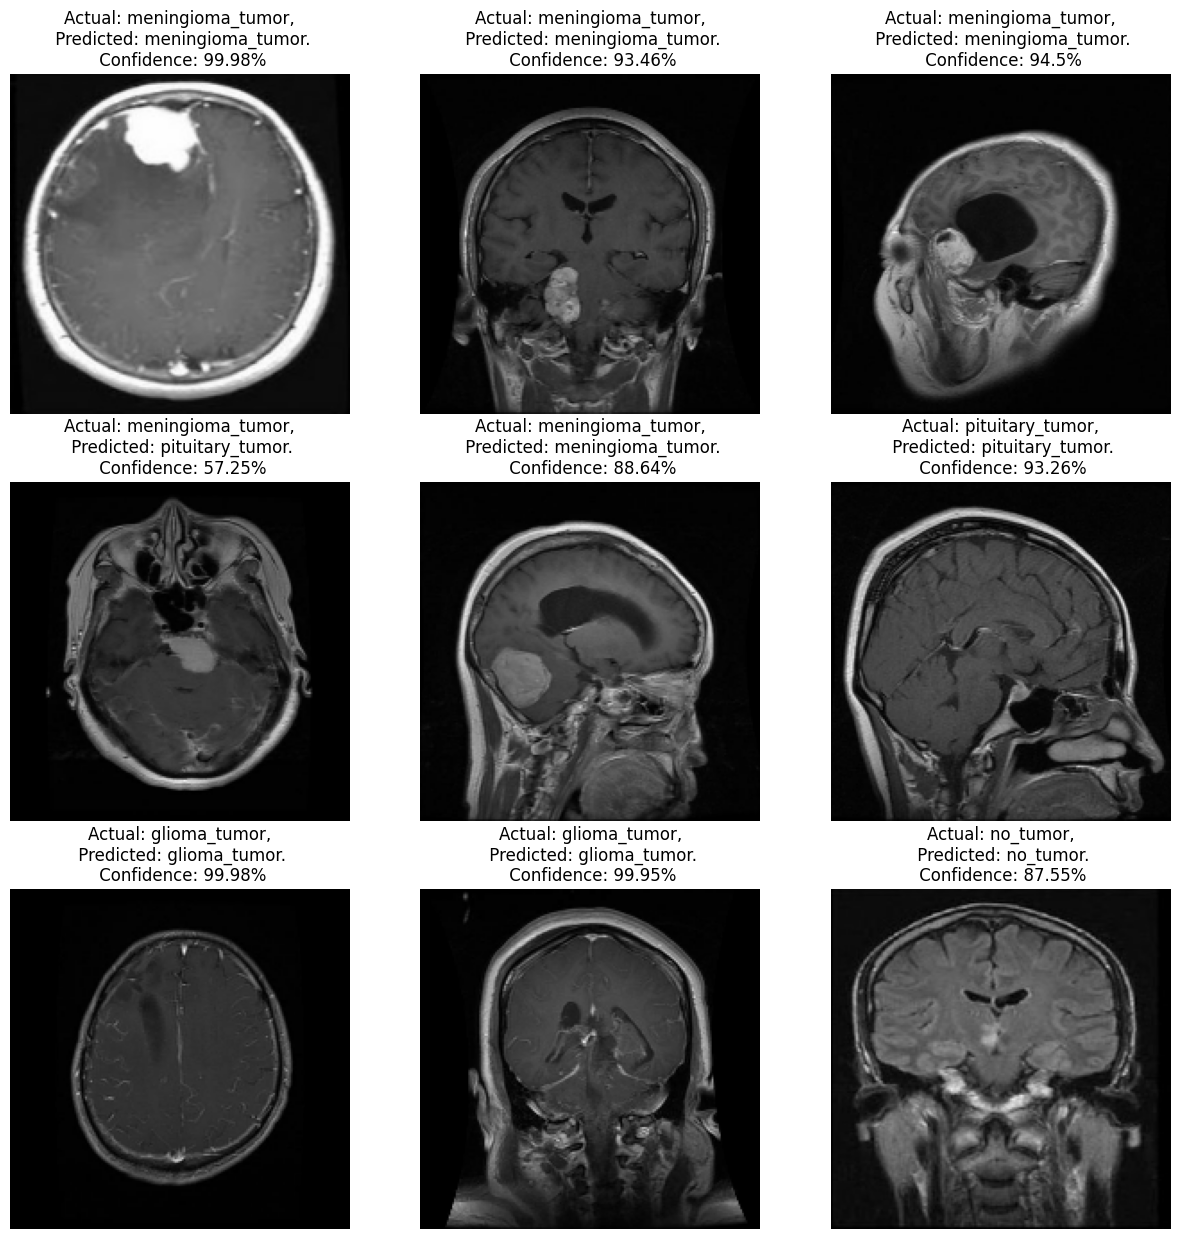

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

This code displays predictions from an image classification model on a sample of test images.

The purpose is to visualize the model's predictions on real test data, to get an idea of how well the model is performing.

It takes as input:

test_ds: a TensorFlow dataset containing test images and their true labels
model: the trained image classification model to make predictions with
class_names: a list of strings mapping integer labels to human-readable class names
It produces as output:

A 3x3 grid of subplot axes visualizing 9 test images, their true vs predicted classes, and the model's confidence percentage.
The main logic flow is:

Loop through the first batch of images and labels from the test dataset
For each of the first 9 images:
Create a subplot and display the test image
Make a prediction on the image using the model
Get the true label by looking up the integer index in class_names
Print the true and predicted classes and confidence percentage as the subplot title
Turn off axes lines to make a clean visualization
So in summary, it takes a batch of test data, runs the images through the model to make predictions, compares to the true labels, and visualizes the results in a grid to provide an overview of how well the model performs on real examples. The main steps are the prediction logic and mapping between integer encodings and human-readable class names. This provides an intuitive visualization for assessing the model's performance.

# Saving the Model


In [42]:
model_version=1
model.save("/content/Model_Main/{model_version}")